In [1]:
import sys
from sklearn.preprocessing import MinMaxScaler
sys.path.append("./../src/")

# Modules of src folder
import data_loader as dl
import run
import visualizations

## Prepare models

In [2]:
uebb = dl.load_uebb_data(from_raw=False)

In [3]:
# See run.py for meaning of these parameters
uk = False
shifts = [1,6,144]
non_nan_percentage = 70
col_to_be_lagged = ["power", "air_density", 'wind_speed_nacelle', 
                    "sonic_wind_direction", "sonic_wind_speed", 
                    'ws_w_corrected', 'wind_speed_cube2', 'relative_humidity1',
                    'wind_speed2', 'wind_direction2', 'wind_speed_std1', 'wind_speed_max1']
val_ratio = 0.2
scalers = [MinMaxScaler(),MinMaxScaler(),MinMaxScaler()]
model_name = "auto"

## Run models

In [4]:
models = run.pipeline(uebb, model_name, uk, shifts, non_nan_percentage, 
                      col_to_be_lagged, val_ratio, scalers)

[ERROR] [2023-06-27 21:33:39,788:Client-AutoML(1):83cfaaea-1521-11ee-94e5-8ac90aeb414d] (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \

type: (' Dummy prediction failed with run state StatusType.CRASHED and additional output: {\'error\': \'Result queue is empty\', \'exit_status\': "<class \'pynisher.limit_function_call.AnythingException\'>", \'subprocess_stdout\': \'\', \'subprocess_stderr\': \'Process pynisher function call:\\nTraceback (most recent call last):\\n  File "/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/multiprocessing/process.py", line 314, in _bootstrap\\n    self.run()\\n  File "/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/multiprocessing/process.py", line 108, in run\\n    self._target(*self._args, **self._kwargs)\\n  File "/opt/homebrew/Caskroom/miniforge/base/envs/renew/lib/python3.11/site-packages/pynisher/limit_function_call.py", line 108, in subprocess_func\\n    resource.setrlimit(resource.RLIMIT_AS, (mem_in_b, mem_in_b))\\nValueError: current limit exceeds maximum limit\\n\', \'exitcode\': 1, \'configuration_origin\': \'DUMMY\'}.',)

## Evaluate results

In [ ]:
visualizations.plot_metrics("Beberide", models)

| Model Name              |     RMSE |   Benchmark_RMSE |      MAE |   Benchmark_MAE |
|:------------------------|---------:|-----------------:|---------:|----------------:|
| Beberide 10min horizon  |  52.4441 |          55.4172 |  34.5955 |         36.245  |
| Beberide 1 hour horizon | 110.993  |         119.25   |  79.5938 |         81.9437 |
| Beberide 1 day horizon  | 178.003  |         196.742  | 130.404  |        151.508  |


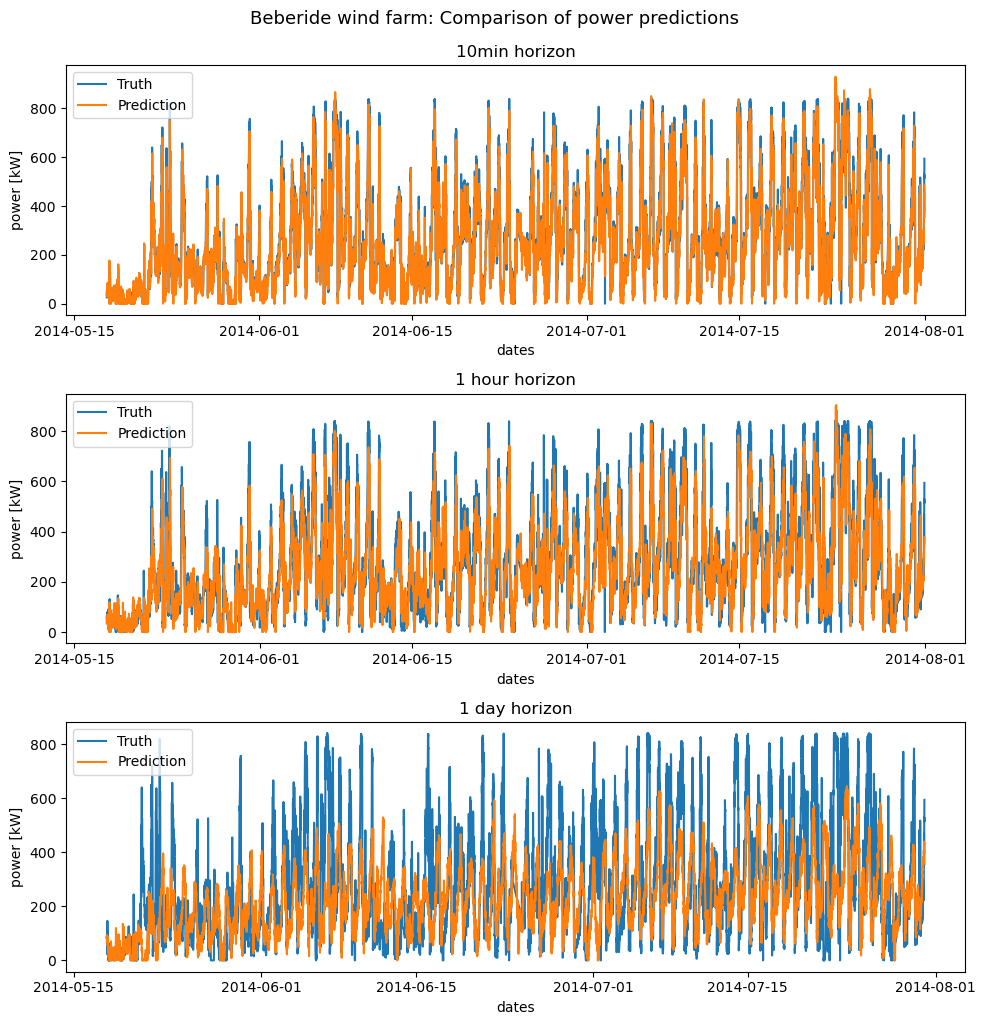

In [ ]:
visualizations.plot_models("Beberide", models)